# ML Simple Linear Regression

本示例演示了如何使用线性回归模型和梯度下降法进行机器学习

In [126]:
#imports
import numpy as np
np.random.seed(1337)  
import matplotlib.pyplot as plt

# 导入数据
我们使用numpy自动生成带噪音的演示数据

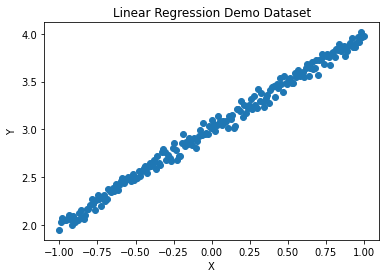

In [127]:
# 生成数据
X = np.linspace(-1, 1, 200) # 返回在（-1, 1）范围内的等差序列
np.random.shuffle(X)        # 打乱顺序
Y = 1 * X + 3 + np.random.normal(0, 0.05, (200, )) # 生成Y并添加噪声

data = [X, Y]                         # data是一个2行，200列的二维数组
points = np.array(data).transpose()   # 转置生成200行，2列的二维数组
# print(points)

# plot显示生成的数据集
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Demo Dataset')
plt.show()



#### 定义超参数 hyperparamters

In [128]:
#超参数 hyperparamters
learning_rate = 0.01    # 学习率
initial_b = 0           # 初始偏置b
initial_w = 0           # 初始权重w
num_iterations = 400    # 迭代次数

#### 定义损失函数 loss function

In [129]:
def compute_loss(b, w, points):
    total_loss = 0
    N = float(len(points))
    #Compute sum of squared errors
    for i in range(0, len(points)):
        X = points[i, 0]
        Y = points[i, 1]
        total_loss += (Y - (w * X + b)) ** 2
        
    #Return average of squared error
    return total_loss/N

#### 定义梯度下降函数 Gradient Descent functions

In [130]:
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    loss_graph = []

    #For every iteration, optimize b, w and compute its loss
    for i in range(num_iterations):
        loss_graph.append(compute_loss(b, w, points))
        b, w = step_gradient(b, w, np.array(points), learning_rate)

    return [b, w, loss_graph]

def step_gradient(b_current, w_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        X = points[i, 0]
        Y = points[i, 1]
        w_gradient += - (2/N) * X * (Y - (w_current * X + b_current))
        b_gradient += - (2/N) * (Y - (w_current * X + b_current))
    
    #Update current w and b
    w_updated = w_current - learning_rate * w_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, w_updated

#### 运行 gradient_descent_runner() 以获取优化的参数b和w

In [131]:
b, w, loss_graph = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized loss:', compute_loss(b, w, points))
print (loss_graph)

Optimized b: 3.0001327189072042
Optimized w: 0.9232447275365624
Minimized loss: 0.004218873581802455
[9.338806635628453, 8.97772921740315, 8.63083462027422, 8.297562759392688, 7.977375708400201, 7.669756822232881, 7.37420989465846, 7.090258349171133, 6.817444461923392, 6.555328615426157, 6.303488581798747, 6.061518834398697, 5.829029886707579, 5.605647657393459, 5.391012860513569, 5.184780419861578, 4.986618906503487, 4.7962099985837945, 4.613247962520164, 4.437439154739669, 4.2685015431431035, 4.106164247516288, 3.9501670981380346, 3.8002602118642614, 3.6562035849962204, 3.517766702268225, 3.3847281613166196, 3.256875312016933, 3.134003910100483, 3.0159177844850085, 2.9024285177763094, 2.793355139419311, 2.688523830997737, 2.587767643201244, 2.4909262239981653, 2.397845557570002, 2.308377713581636, 2.2223806063779628, 2.139717763713904, 2.0602581046402837, 1.9838757261830762, 1.910449698467795, 1.8398638679546528, 1.7720066684633187, 1.7067709396788626, 1.644053752842626, 1.5837562433

#### 损失函数值趋势绘图

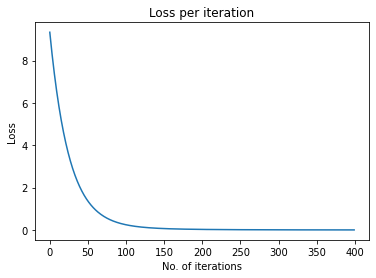

In [132]:
plt.plot(loss_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss per iteration')
plt.show()

梯度下降在100次迭代后趋向于收敛到局部最小值

#### 将预测结果绘图

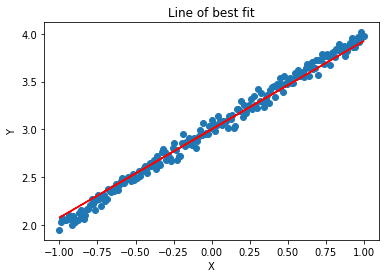

In [133]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = w * X + b
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of best fit')
plt.show()